In [1]:
# Import necessary modules
import sys
sys.path.append('../fraud_detection')  # Adjust this path based on your working directory
from utils.logging_util import setup_logger

# notebooks/eda_fraud_detection.ipynb

# Import the necessary functions from your project
# from model_training import prepare_data, train_logistic_regression , train_random_forest , train_gradient_boosting ,train_decision_tree,  train_mlp,train_rnn,train_cnn,train_lstm
from model_training import (prepare_data, prepare_credit_card_data,prepare_large_data,train_and_select_best_model )

from model_evaluation import evaluate_model

from model_explainability import  explain_with_shap, explain_with_lime, explain_model_with_shap_and_lime


c:\Users\Yonas\Desktop\proj\yonasKu-fraud-detection-for-e-commerce-and-bank-transactions\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# data_path = '../data/fraud_datas.csv'
# prepared_data = prepare_data(data_path, target_column='fraud_class')


In [2]:
# Path to the credit card dataset
data_path = "../data/credit_datas.csv"
target_column = "Class"  # Target column indicating fraud (1 = Fraud, 0 = Non-Fraud)

# Prepare the data for credit card fraud detection
credit_data = prepare_credit_card_data(data_path, target_column)

2024-12-08 22:51:07,076 - ../logs/training.log - INFO - Loaded data from ../data/credit_datas.csv
2024-12-08 22:51:07,527 - ../logs/training.log - INFO - Data successfully split into training and testing sets.
2024-12-08 22:51:08,007 - ../logs/training.log - INFO - Feature scaling applied.


In [3]:
data_path = '../data/Fraudlent_Datas.csv'
prepared_data = prepare_large_data(data_path, target_column='class')

2024-12-08 22:51:10,311 - ../logs/training.log - INFO - Loaded data from ../data/Fraudlent_Datas.csv
2024-12-08 22:51:11,342 - ../logs/training.log - INFO - Calculated 'time_to_purchase' and dropped 'signup_time' and 'purchase_time'.
2024-12-08 22:51:11,440 - ../logs/training.log - INFO - Encoded 'country' using frequency encoding.
2024-12-08 22:51:11,558 - ../logs/training.log - INFO - Encoded column: source using one-hot encoding.
2024-12-08 22:51:11,655 - ../logs/training.log - INFO - Encoded column: browser using one-hot encoding.
2024-12-08 22:51:11,741 - ../logs/training.log - INFO - Encoded column: sex using one-hot encoding.
2024-12-08 22:51:11,764 - ../logs/training.log - INFO - Dropped irrelevant columns: ['user_id', 'device_id', 'ip_address']
2024-12-08 22:51:11,781 - ../logs/training.log - INFO - Features (X) and target (y) defined. Target column: class
2024-12-08 22:51:11,840 - ../logs/training.log - INFO - Data split into train and test sets with test size = 0.2.
2024-12-

In [ ]:


# # Accessing the training and testing sets for credit card fraud detection
# X_train_credit = credit_data['X_train']
# X_test_credit = credit_data['X_test']
# y_train_credit = credit_data['y_train']
# y_test_credit = credit_data['y_test']
# scaler_credit = prepared_data.get('scaler')
# # Display confirmation
# print("Credit card fraud data successfully prepared.")
# print(f"Training set size: {X_train_credit.shape[0]} samples")
# print(f"Test set size: {X_test_credit.shape[0]} samples")


In [ ]:

# # Access the prepared data
# X_train = prepared_data['X_train']
# X_test = prepared_data['X_test']
# y_train = prepared_data['y_train']
# y_test = prepared_data['y_test']
# scaler = prepared_data.get('scaler')

# # Display confirmation
# print("fraud data successfully prepared.")
# print(f"Training set size: {X_train.shape[0]} samples")
# print(f"Test set size: {X_test.shape[0]} samples")

In [5]:

# Access the prepared data
X_train = prepared_data['X_train']
X_test = prepared_data['X_test']
y_train = prepared_data['y_train']
y_test = prepared_data['y_test']
scaler = prepared_data.get('scaler')

# Display confirmation
print("Credit card fraud data successfully prepared.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

feature_names = prepared_data['feature_names']
print("Feature names in X_train (before scaling):")
print(feature_names)

Credit card fraud data successfully prepared.
Training set size: 103316 samples
Test set size: 25830 samples
Feature names in X_train (before scaling):
['purchase_value', 'age', 'transaction_frequency', 'transaction_count', 'transaction_velocity', 'hour_of_day', 'day_of_week', 'time_to_purchase', 'country_encoded', 'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_M']


In [ ]:

# # Train and save the Logistic Regression model and its scaler
# logistic_model_path = '../models/logistic_regression_model.pkl'
# logistic_scaler_path = '../models/logistic_regression_scaler.pkl'
# logistic_results = train_logistic_regression(X_train, X_test, y_train, y_test, logistic_model_path, scaler, logistic_scaler_path)

# # Train and save the Random Forest model and its scaler
# random_forest_model_path = '../models/random_forest_model.pkl'
# random_forest_scaler_path = '../models/random_forest_scaler.pkl'
# random_forest_results = train_random_forest(X_train, X_test, y_train, y_test, random_forest_model_path, scaler, random_forest_scaler_path)

# # Display results
# print(logistic_results)
# print(random_forest_results)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

import joblib

In [5]:
# prepared_data = prepare_credit_card_data(data_path, target_column)
X_train, X_test = prepared_data['X_train'], prepared_data['X_test']
y_train, y_test = prepared_data['y_train'], prepared_data['y_test']
feature_names = prepared_data['feature_names']
# Define models to train
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100)
}

# Train models and find the best one
# best_model_details = train_and_select_best_model(models, X_train, X_test, y_train, y_test)

best_model_details = train_and_select_best_model(
    models,
    X_train,
    X_test,
    y_train,
    y_test,
    feature_names  # Pass feature names for later explainability
)



2024-12-08 22:51:12,154 - ../logs/training.log - INFO - Training model: LogisticRegression
2024-12-08 22:51:13,406 - ../logs/training.log - INFO - Training LogisticRegression...
2024-12-08 22:51:13,676 - ../logs/training.log - INFO - LogisticRegression training complete.
2024/12/08 22:51:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024-12-08 22:51:48,984 - ../logs/training.log - INFO - LogisticRegression logged to MLflow.
2024-12-08 22:51:49,034 - ../logs/training.log - INFO - Training model: DecisionTree
2024-12-08 22:51:49,516 - ../logs/training.log - INFO - Training DecisionTree...
2024-12-08 22:51:56,565 - ../logs/training.log - INFO - DecisionTree training complete.
2024/12/08 22:52:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model 

In [6]:
# # Save the best model locally
# joblib.dump(best_model_details["model"], f"../models/{best_model_details['name']}_best_model.pkl")
# Save the best model locally
joblib.dump(best_model_details["model"], f"../models/best_model.pkl")

['../models/best_model.pkl']

In [ ]:
X_train[0]

array([-1.36132847, -0.82760201,  0.        ,  0.        ,  1.14470506,
        0.65092866, -0.00774329,  1.14470506, -0.60885306, -0.50240047,
        1.21749932,  2.26488288, -0.56556166, -0.15714965, -0.44121088,
        0.84387037])

In [7]:
# Access the prepared credit card fraud data
X_train_credit = credit_data['X_train']
X_test_credit = credit_data['X_test']
y_train_credit = credit_data['y_train']
y_test_credit = credit_data['y_test']
feature_names_credit = credit_data['feature_names']
# Define models to train
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100)
}

# Train models and find the best one
# best_credit_model_details = train_and_select_best_model(models, X_train, X_test, y_train, y_test)

best_credit_model_details = train_and_select_best_model(
    models,
    X_train_credit,
    X_test_credit,
    y_train_credit,
    y_test_credit,
    feature_names  # Pass feature names for later explainability
)



2024-12-08 22:55:15,686 - ../logs/training.log - INFO - Training model: LogisticRegression
2024-12-08 22:55:16,322 - ../logs/training.log - INFO - Training LogisticRegression...
2024-12-08 22:55:20,143 - ../logs/training.log - INFO - LogisticRegression training complete.
2024/12/08 22:55:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024-12-08 22:55:32,238 - ../logs/training.log - INFO - LogisticRegression logged to MLflow.
2024-12-08 22:55:32,252 - ../logs/training.log - INFO - Training model: DecisionTree
2024-12-08 22:55:32,481 - ../logs/training.log - INFO - Training DecisionTree...
2024-12-08 22:56:57,420 - ../logs/training.log - INFO - DecisionTree training complete.
2024/12/08 22:57:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model 

In [8]:
joblib.dump(best_credit_model_details["model"], f"../models/best_credit_model.pkl")

['../models/best_credit_model.pkl']

2024-12-08 23:21:50,704 - ../logs/explainability.log - INFO - Initializing SHAP explainer...
2024-12-08 23:21:50,734 - ../logs/explainability.log - INFO - Computing SHAP values...
2024-12-08 23:21:50,757 - ../logs/explainability.log - INFO - Generating SHAP summary plot...


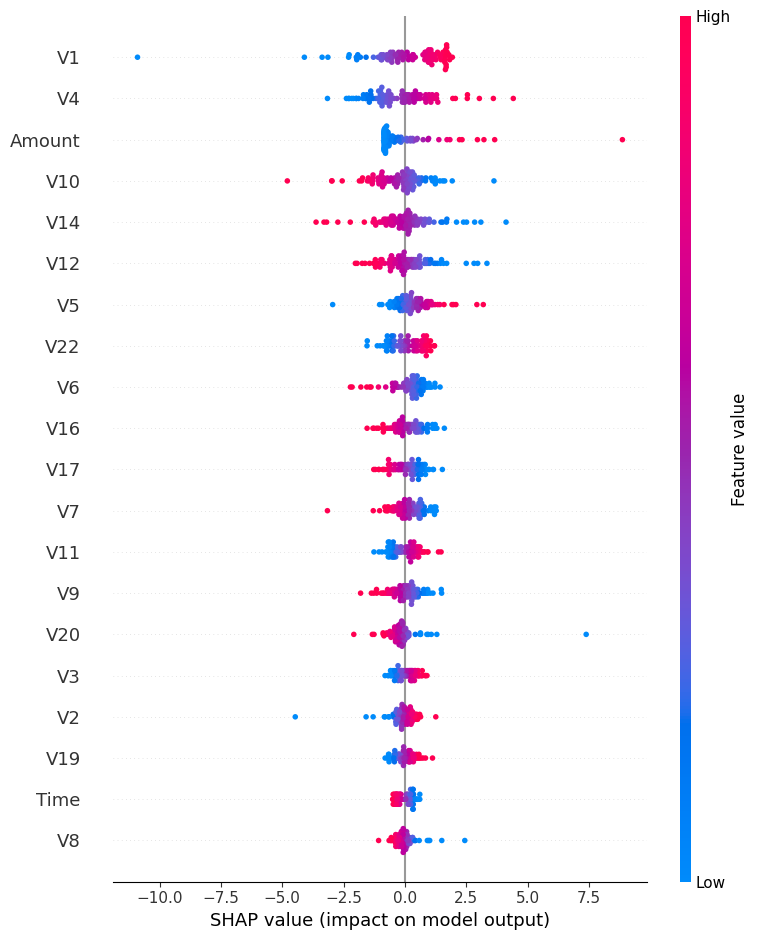

2024-12-08 23:21:52,654 - ../logs/explainability.log - INFO - Initializing LIME explainer...
2024-12-08 23:22:00,155 - ../logs/explainability.log - INFO - Explaining sample index 0...
2024-12-08 23:22:00,380 - ../logs/explainability.log - INFO - Generating LIME visualization...


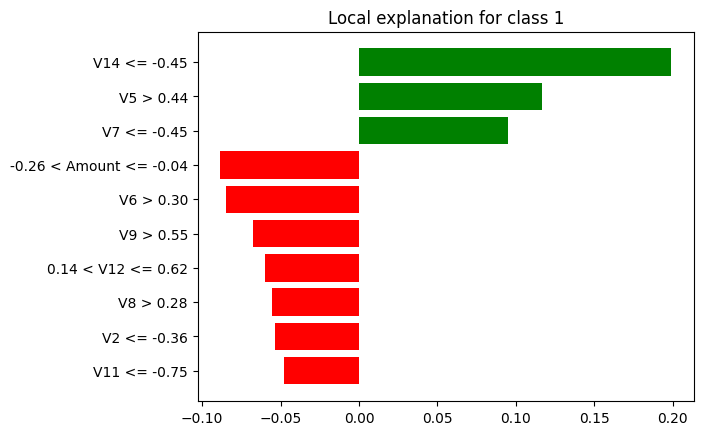

2024-12-08 23:22:01,959 - ../logs/explainability.log - INFO - Starting model explanation using SHAP and LIME...
2024-12-08 23:22:01,962 - ../logs/explainability.log - INFO - Initializing SHAP explainer...
2024-12-08 23:22:02,004 - ../logs/explainability.log - INFO - Computing SHAP values...
2024-12-08 23:22:02,023 - ../logs/explainability.log - INFO - Generating SHAP summary plot...


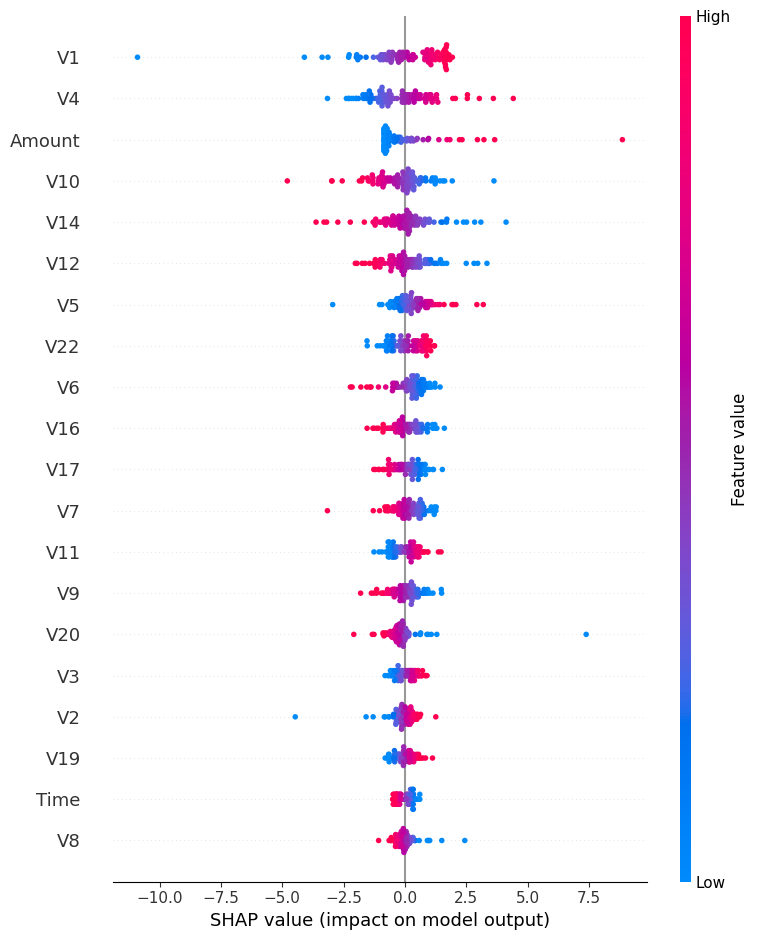

2024-12-08 23:22:03,764 - ../logs/explainability.log - INFO - Initializing LIME explainer...
2024-12-08 23:22:09,144 - ../logs/explainability.log - INFO - Explaining sample index 0...
2024-12-08 23:22:09,312 - ../logs/explainability.log - INFO - Generating LIME visualization...


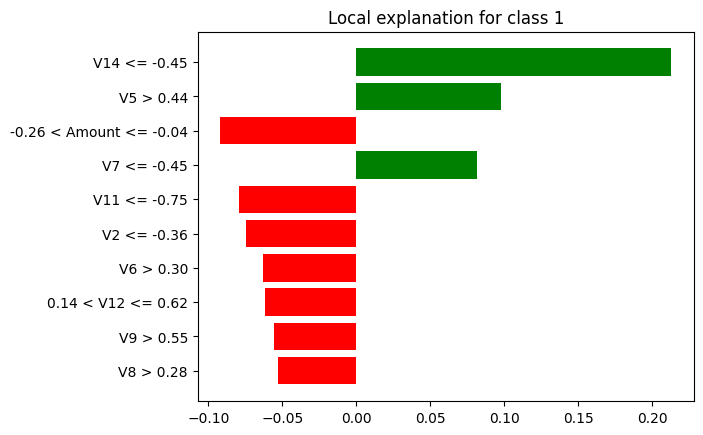

2024-12-08 23:22:09,751 - ../logs/explainability.log - INFO - Explanation complete.


In [9]:

# Load data and models
X_train_credit = credit_data["X_train"]
X_test_credit = credit_data["X_test"]
y_train_credit = credit_data["y_train"]
y_test_credit = credit_data["y_test"]

# Best model from training
best_model = best_credit_model_details["model"]
feature_names = credit_data["feature_names"]

# Use SHAP to explain the model
shap_values = explain_with_shap(best_model, X_train_credit, X_test_credit, feature_names)

# Use LIME to explain a specific prediction
lime_explanation = explain_with_lime(
    best_model, X_train_credit, X_test_credit, y_train_credit, feature_names, sample_index=0, num_features=10
)

# Combined SHAP and LIME explanation
shap_values, lime_explanation = explain_model_with_shap_and_lime(
    best_model, X_train_credit, X_test_credit, y_train_credit, feature_names, sample_size=100, lime_sample_index=0
)

2024-12-09 20:00:34,384 - ../logs/explainability.log - INFO - Initializing SHAP explainer...
2024-12-09 20:00:34,425 - ../logs/explainability.log - INFO - Computing SHAP values...
2024-12-09 20:00:34,669 - ../logs/explainability.log - INFO - Generating SHAP summary plot...


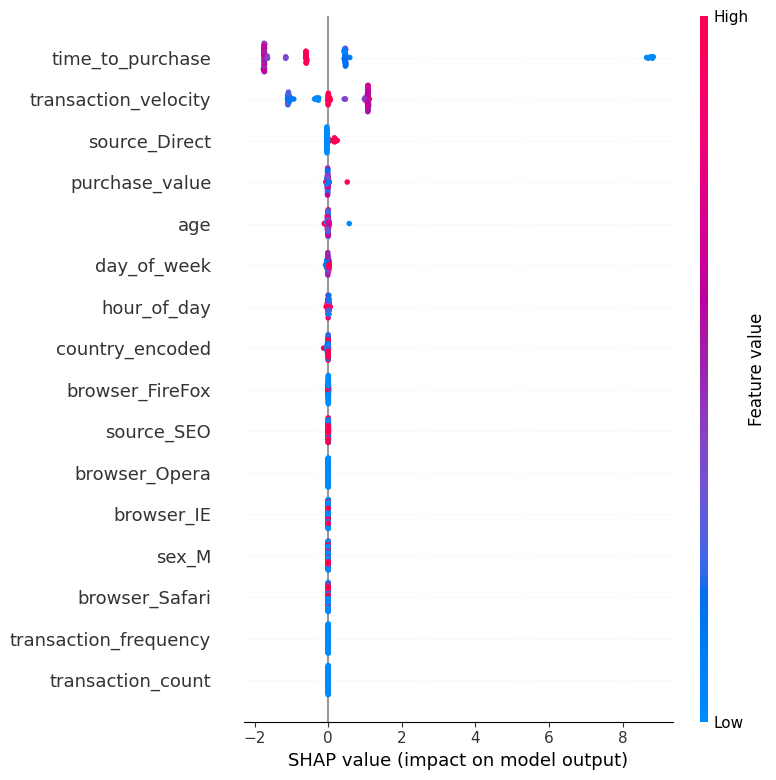

2024-12-09 20:00:35,903 - ../logs/explainability.log - INFO - Initializing LIME explainer...
2024-12-09 20:00:37,808 - ../logs/explainability.log - INFO - Explaining sample index 0...
2024-12-09 20:00:37,991 - ../logs/explainability.log - INFO - Generating LIME visualization...


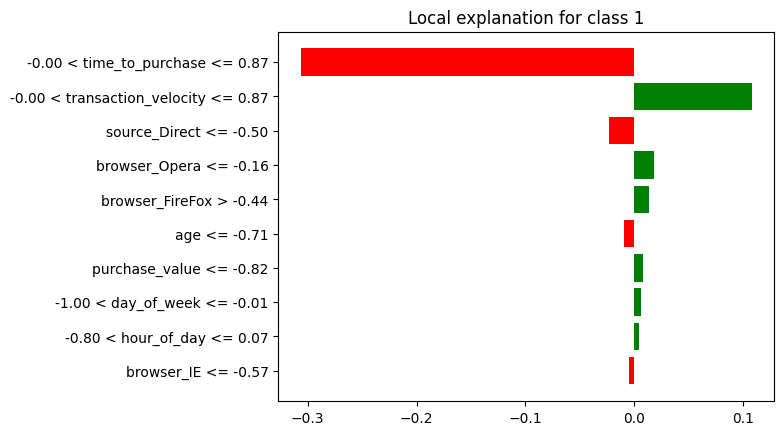

2024-12-09 20:00:38,873 - ../logs/explainability.log - INFO - Starting model explanation using SHAP and LIME...
2024-12-09 20:00:38,878 - ../logs/explainability.log - INFO - Initializing SHAP explainer...
2024-12-09 20:00:38,984 - ../logs/explainability.log - INFO - Computing SHAP values...
2024-12-09 20:00:39,349 - ../logs/explainability.log - INFO - Generating SHAP summary plot...


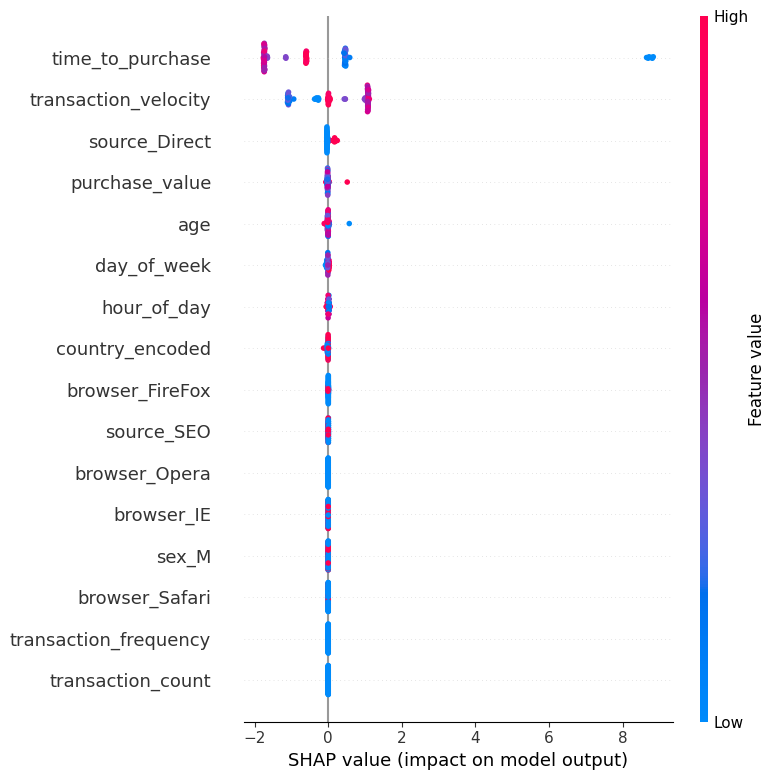

2024-12-09 20:00:42,038 - ../logs/explainability.log - INFO - Initializing LIME explainer...
2024-12-09 20:00:44,740 - ../logs/explainability.log - INFO - Explaining sample index 0...
2024-12-09 20:00:44,865 - ../logs/explainability.log - INFO - Generating LIME visualization...


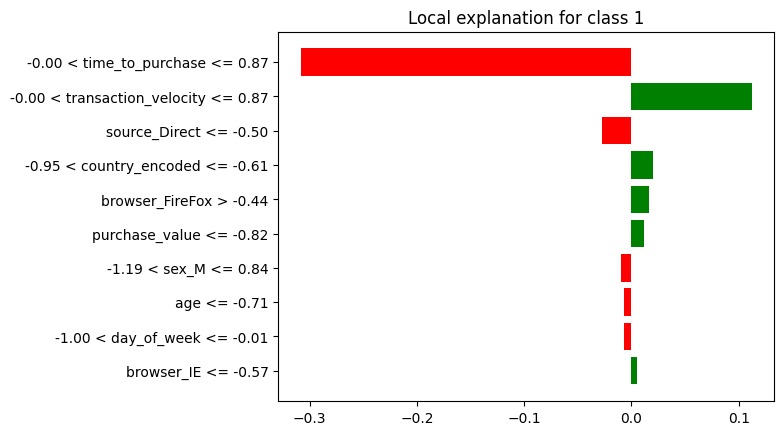

2024-12-09 20:00:45,606 - ../logs/explainability.log - INFO - Explanation complete.


In [11]:

# Load data and models
X_train = prepared_data["X_train"]
X_test = prepared_data["X_test"]
y_train = prepared_data["y_train"]
y_test = prepared_data["y_test"]

# Best model from training
best_model = best_model_details["model"]
feature_names = prepared_data["feature_names"]

# Use SHAP to explain the model
shap_values = explain_with_shap(best_model, X_train, X_test, feature_names)

# Use LIME to explain a specific prediction
lime_explanation = explain_with_lime(
    best_model, X_train, X_test, y_train, feature_names, sample_index=0, num_features=10
)

# Combined SHAP and LIME explanation
shap_values, lime_explanation = explain_model_with_shap_and_lime(
    best_model, X_train, X_test, y_train, feature_names, sample_size=100, lime_sample_index=0
)

In [14]:
X_train

array([[-1.36132847, -0.82760201,  0.        , ..., -0.15714965,
        -0.44121088,  0.84387037],
       [-1.36132847,  1.72764968,  0.        , ..., -0.15714965,
        -0.44121088,  0.84387037],
       [-1.1977945 , -0.47915859,  0.        , ..., -0.15714965,
         2.26648992, -1.18501614],
       ...,
       [-1.30681714,  0.45002384,  0.        , ..., -0.15714965,
        -0.44121088,  0.84387037],
       [-1.52486244, -1.29219322,  0.        , ..., -0.15714965,
        -0.44121088, -1.18501614],
       [ 0.76461318,  1.03076286,  0.        , ..., -0.15714965,
        -0.44121088,  0.84387037]])

In [ ]:
# # Access the prepared credit card fraud data
# X_train_credit = credit_data['X_train']
# X_test_credit = credit_data['X_test']
# y_train_credit = credit_data['y_train']
# y_test_credit = credit_data['y_test']
# credit_scaler = credit_data.get('scaler')

# # Train and save the Logistic Regression model for credit card fraud detection
# credit_logistic_model_path = '../models/credit_logistic_regression_model.pkl'
# credit_logistic_scaler_path = '../models/credit_logistic_scaler.pkl'
# credit_logistic_results = train_logistic_regression(
#     X_train_credit, X_test_credit, y_train_credit, y_test_credit, 
#     credit_logistic_model_path, credit_scaler, credit_logistic_scaler_path
# )

# # Train and save the Random Forest model for credit card fraud detection
# credit_random_forest_model_path = '../models/credit_random_forest_model.pkl'
# credit_random_forest_scaler_path = '../models/credit_random_forest_scaler.pkl'
# credit_random_forest_results = train_random_forest(
#     X_train_credit, X_test_credit, y_train_credit, y_test_credit, 
#     credit_random_forest_model_path, credit_scaler, credit_random_forest_scaler_path
# )

# # Display results for credit card fraud detection models
# print("\nLogistic Regression Results (Credit Card Fraud):")
# print(credit_logistic_results)

# print("\nRandom Forest Results (Credit Card Fraud):")
# print(credit_random_forest_results)

In [ ]:
# # Define paths for Decision Tree and Gradient Boosting models and scalers
# decision_tree_model_path = '../models/decision_tree_model.pkl'
# decision_tree_scaler_path = '../models/decision_tree_scaler.pkl'

# gradient_boosting_model_path = '../models/gradient_boosting_model.pkl'
# gradient_boosting_scaler_path = '../models/gradient_boosting_scaler.pkl'


# # Train and save the Decision Tree model and its scaler
# decision_tree_results = train_decision_tree(
#     X_train, X_test, y_train, y_test, decision_tree_model_path, scaler, decision_tree_scaler_path
# )

# # Train and save the Gradient Boosting model and its scaler
# gradient_boosting_results = train_gradient_boosting(
#     X_train, X_test, y_train, y_test, gradient_boosting_model_path, scaler, gradient_boosting_scaler_path
# )

# # Display results
# print("\nDecision Tree Model Results:")
# print(decision_tree_results)

# print("\nGradient Boosting Model Results:")
# print(gradient_boosting_results)


In [ ]:
# credit_decision_tree_model_path = '../models/credit_decision_tree_model.pkl'
# credit_decision_tree_scaler_path = '../models/credit_decision_tree_scaler.pkl'

# credit_gradient_boosting_model_path = '../models/credit_gradient_boosting_model.pkl'
# credit_gradient_boosting_scaler_path = '../models/credit_gradient_boosting_scaler.pkl'


# # Train and save the Decision Tree model for credit card fraud detection
# credit_decision_tree_results = train_decision_tree(
#     X_train_credit, X_test_credit, y_train_credit, y_test_credit,
#     credit_decision_tree_model_path, credit_scaler, credit_decision_tree_scaler_path
# )

# # Train and save the Gradient Boosting model for credit card fraud detection
# credit_gradient_boosting_results = train_gradient_boosting(
#     X_train_credit, X_test_credit, y_train_credit, y_test_credit,
#     credit_gradient_boosting_model_path, credit_scaler, credit_gradient_boosting_scaler_path
# )

# # Display results for credit card fraud detection models
# print("\nDecision Tree Model Results (Credit Card Fraud):")
# print(credit_decision_tree_results)

# print("\nGradient Boosting Model Results (Credit Card Fraud):")
# print(credit_gradient_boosting_results)

In [ ]:
# # Extract the model objects from the training results
# logistic_model = logistic_results["model"]
# decision_tree_model = decision_tree_results["model"]
# random_forest_model = random_forest_results["model"]
# gradient_boosting_model = gradient_boosting_results["model"]

# # Evaluate each model
# logistic_evaluation = evaluate_model(logistic_model, X_test, y_test)
# decision_tree_evaluation = evaluate_model(decision_tree_model, X_test, y_test)
# random_forest_evaluation = evaluate_model(random_forest_model, X_test, y_test)
# gradient_boosting_evaluation = evaluate_model(gradient_boosting_model, X_test, y_test)

# # Display evaluation results
# print("Logistic Regression Evaluation:")
# print(logistic_evaluation)

# print("\nDecision Tree Evaluation:")
# print(decision_tree_evaluation)

# print("\nRandom Forest Evaluation:")
# print(random_forest_evaluation)

# print("\nGradient Boosting Evaluation:")
# print(gradient_boosting_evaluation)

In [ ]:
# # Extract the model objects from the training results for credit card fraud detection
# credit_logistic_model = credit_logistic_results["model"]
# credit_decision_tree_model = credit_decision_tree_results["model"]
# credit_random_forest_model = credit_random_forest_results["model"]
# credit_gradient_boosting_model = credit_gradient_boosting_results["model"]

# # Evaluate each credit card fraud detection model
# credit_logistic_evaluation = evaluate_model(credit_logistic_model, X_test_credit, y_test_credit)
# credit_decision_tree_evaluation = evaluate_model(credit_decision_tree_model, X_test_credit, y_test_credit)
# credit_random_forest_evaluation = evaluate_model(credit_random_forest_model, X_test_credit, y_test_credit)
# credit_gradient_boosting_evaluation = evaluate_model(credit_gradient_boosting_model, X_test_credit, y_test_credit)

# # Display evaluation results for credit card fraud detection models
# print("Logistic Regression Evaluation (Credit Card Fraud):")
# print(credit_logistic_evaluation)

# print("\nDecision Tree Evaluation (Credit Card Fraud):")
# print(credit_decision_tree_evaluation)

# print("\nRandom Forest Evaluation (Credit Card Fraud):")
# print(credit_random_forest_evaluation)

# print("\nGradient Boosting Evaluation (Credit Card Fraud):")
# print(credit_gradient_boosting_evaluation)


In [ ]:
# Explaining Logistic Regression Model
print("Explaining Logistic Regression Model:")

# SHAP explanation for Logistic Regression
logistic_shap_values = explain_model_shap(logistic_model, X_train, X_test, model_type='lr')

# LIME explanation for Logistic Regression
print("LIME explanation for Logistic Regression:")
explanation_lime_lr = explain_model_lime(logistic_model, X_train, X_test, idx=0)


# Explaining Decision Tree Model
print("Explaining Decision Tree Model:")

# SHAP explanation for Decision Tree
decision_tree_shap_values = explain_model_shap(decision_tree_model, X_train, X_test, model_type='rf')

# LIME explanation for Decision Tree
print("LIME explanation for Decision Tree:")
explanation_lime_dt = explain_model_lime(decision_tree_model, X_train, X_test, idx=0)


# Explaining Random Forest Model
print("Explaining Random Forest Model:")

# SHAP explanation for Random Forest
random_forest_shap_values = explain_model_shap(random_forest_model, X_train, X_test, model_type='rf')

# LIME explanation for Random Forest
print("LIME explanation for Random Forest:")
explanation_lime_rf = explain_model_lime(random_forest_model, X_train, X_test, idx=0)


# Explaining Gradient Boosting Model
print("Explaining Gradient Boosting Model:")

# SHAP explanation for Gradient Boosting
gradient_boosting_shap_values = explain_model_shap(gradient_boosting_model, X_train, X_test, model_type='rf')

# LIME explanation for Gradient Boosting
print("LIME explanation for Gradient Boosting:")
explanation_lime_gb = explain_model_lime(gradient_boosting_model, X_train, X_test, idx=0)


In [ ]:
print(X_train.shape)  # Output will be in the form (num_samples, num_features)


In [ ]:
# Explaining Logistic Regression Model (Credit Card Fraud)
print("Explaining Logistic Regression Model (Credit Card Fraud):")

# SHAP explanation for Logistic Regression
credit_logistic_shap_values = explain_model_shap(
    credit_logistic_model, X_train_credit, X_test_credit, model_type='lr'
)

# LIME explanation for Logistic Regression
print("LIME Explanation for Logistic Regression (Credit Card Fraud):")
credit_explanation_lime_lr = explain_model_lime(
    credit_logistic_model, X_train_credit, X_test_credit, idx=0
)


# Explaining Decision Tree Model (Credit Card Fraud)
print("Explaining Decision Tree Model (Credit Card Fraud):")

# SHAP explanation for Decision Tree
credit_decision_tree_shap_values = explain_model_shap(
    credit_decision_tree_model, X_train_credit, X_test_credit, model_type='rf'
)

# LIME explanation for Decision Tree
print("LIME Explanation for Decision Tree (Credit Card Fraud):")
credit_explanation_lime_dt = explain_model_lime(
    credit_decision_tree_model, X_train_credit, X_test_credit, idx=0
)


# Explaining Random Forest Model (Credit Card Fraud)
print("Explaining Random Forest Model (Credit Card Fraud):")

# SHAP explanation for Random Forest
credit_random_forest_shap_values = explain_model_shap(
    credit_random_forest_model, X_train_credit, X_test_credit, model_type='rf'
)

# LIME explanation for Random Forest
print("LIME Explanation for Random Forest (Credit Card Fraud):")
credit_explanation_lime_rf = explain_model_lime(
    credit_random_forest_model, X_train_credit, X_test_credit, idx=0
)


# Explaining Gradient Boosting Model (Credit Card Fraud)
print("Explaining Gradient Boosting Model (Credit Card Fraud):")

# SHAP explanation for Gradient Boosting
credit_gradient_boosting_shap_values = explain_model_shap(
    credit_gradient_boosting_model, X_train_credit, X_test_credit, model_type='rf'
)

# LIME explanation for Gradient Boosting
print("LIME Explanation for Gradient Boosting (Credit Card Fraud):")
credit_explanation_lime_gb = explain_model_lime(
    credit_gradient_boosting_model, X_train_credit, X_test_credit, idx=0
)


In [ ]:

# # Define file paths for saving models
# mlp_model_path = '../models/mlp_model.h5'
# rnn_model_path = '../models/rnn_model.h5'
# cnn_model_path = '../models/cnn_model.h5'
# lstm_model_path = '../models/lstm_model.h5'

# # Train and save the MLP model
# print("Training MLP model...")
# mlp_model, mlp_history = train_mlp(X_train, X_test, y_train, y_test, mlp_model_path)
# print("\nMLP Model Training History:")
# print(mlp_history)



# # Train and save the LSTM model
# print("\nTraining LSTM model...")
# lstm_model, lstm_history = train_lstm(X_train, X_test, y_train, y_test, lstm_model_path)
# print("\nLSTM Model Training History:")
# print(lstm_history)

In [ ]:
# # Train and save the CNN model
# print("\nTraining CNN model...")
# cnn_model, cnn_history = train_cnn(X_train, X_test, y_train, y_test, cnn_model_path)
# print("\nCNN Model Training History:")
# print(cnn_history)

# # Train and save the RNN model
# print("\nTraining RNN model...")
# rnn_model, rnn_history = train_rnn(X_train, X_test, y_train, y_test, rnn_model_path)
# print("\nRNN Model Training History:")
# print(rnn_history)

In [ ]:
# # Evaluate the MLP, RNN, and LSTM models
# mlp_evaluation = evaluate_model(mlp_model, X_test, y_test)
# rnn_evaluation = evaluate_model(rnn_model, X_test, y_test)
# lstm_evaluation = evaluate_model(lstm_model, X_test, y_test)

# # Display evaluation results
# print("\nMLP Model Evaluation:")
# print(mlp_evaluation)

# print("\nRNN Model Evaluation:")
# print(rnn_evaluation)

# print("\nLSTM Model Evaluation:")
# print(lstm_evaluation)


In [ ]:
# # Paths to the saved models
# mlp_model_path = '../models/mlp_model.h5'
# rnn_model_path = '../models/rnn_model.h5'
# cnn_model_path = '../models/cnn_model.h5'
# lstm_model_path = '../models/lstm_model.h5'

# # Load the saved models
# mlp_model = load_model(mlp_model_path)
# rnn_model = load_model(rnn_model_path)
# cnn_model = load_model(cnn_model_path)
# lstm_model = load_model(lstm_model_path)

# # Test the models and evaluate them
# print("Evaluating MLP model...")
# mlp_evaluation = evaluate_model(mlp_model, X_test, y_test)
# print("MLP Model Evaluation:", mlp_evaluation)

# print("\nEvaluating RNN model...")
# rnn_evaluation = evaluate_model(rnn_model, X_test, y_test)
# print("RNN Model Evaluation:", rnn_evaluation)

# print("\nEvaluating CNN model...")
# cnn_evaluation = evaluate_model(cnn_model, X_test, y_test)
# print("CNN Model Evaluation:", cnn_evaluation)

# print("\nEvaluating LSTM model...")
# lstm_evaluation = evaluate_model(lstm_model, X_test, y_test)
# print("LSTM Model Evaluation:", lstm_evaluation)